In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas_profiling

C:\Users\Sureliano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_titles = pd.read_csv("titles.csv")

df_titles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

<AxesSubplot:xlabel='type', ylabel='runtime'>

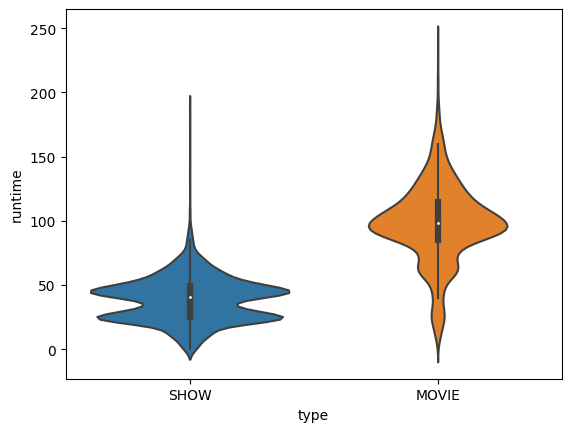

In [6]:
#Analisis de Tipo vs Duracion

sns.violinplot(x=df_titles['type'], y=df_titles['runtime'])

In [18]:
#Analisis de Puntaje tmdb vs Puntaje Imdb

#Limpieza de columna generos
generos = df_titles['genres']
generos = generos.astype("string")
generos = generos.str.replace("[","")
generos = generos.str.replace(" ","")
generos = generos.str.replace("]","")
generos = generos.str.split(",",expand=True)
#Agrego todos los generos en una sola columna, en el df original, peliculas con mas de un genero en esta columna
generos_sumados = pd.Series("string")
for col in generos:
    generos_sumados = pd.concat([generos_sumados,generos[col]], ignore_index=True)
#Quito los varoles nulos y datos incongruentes
generos_sumados = generos_sumados.astype("string")
generos_sumados.sort_values()
generos_sumados = generos_sumados[generos_sumados != "<NA>"]
generos_sumados = generos_sumados[generos_sumados != "string"]
generos_sumados = generos_sumados[generos_sumados != ""]
generos_sumados = generos_sumados.groupby()

sns.heatmap(generos_sumados, df_titles['imdb_score'].mean())


C:\Users\Sureliano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
C:\Users\Sureliano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


TypeError: You have to supply one of 'by' and 'level'

Se puede ver que poseen una semejanza en gran cantidad de puntajes, pero no en todos, por lo que se puede tomar como referencia uno del otro.

<AxesSubplot:xlabel='age_certification', ylabel='release_year'>

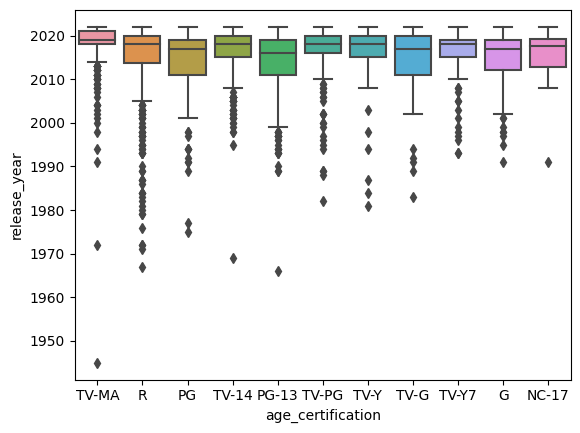

In [21]:
#Analisis de certificacion por año.

sns.boxplot(x=df_titles['age_certification'], y=df_titles['release_year'])

En el ultimo puede verse que en el ultimo tiempo hubo un incremento significativo en la creacion de contenido TV-MA dirigido a publico maduro, mientras que las PG-13 para mayores de 13 años tuvieron su apogeo luego del 2010.